# <div align="center">CP322-A Mini-Project 3: Machine Learning</div>
## <div align="center">Group 6</div>
### <div align="center">due on 10-Dec-2023 at 11:30 PM</div>

Imports:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# conda install pytorch torchvision torchaudio -c pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

## Load Dataset: CIFAR10

In [3]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the data
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Set up data loaders
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


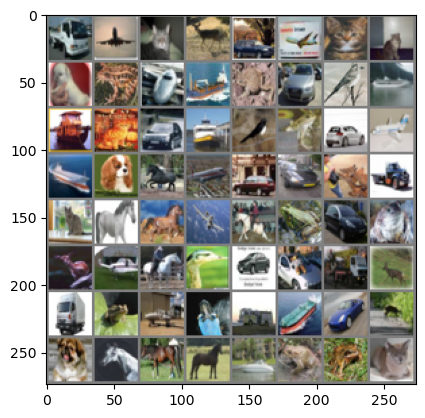

truck plane cat   deer 


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# functions to show an image
batch_size = 4

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## ANN Model

Epoch 1, Mini-batch 200, Loss: 2.2949777591228484
Epoch 1, Mini-batch 400, Loss: 2.2646675622463226
Epoch 1, Mini-batch 600, Loss: 2.1898953223228457
Epoch 2, Mini-batch 200, Loss: 2.016260909438133
Epoch 2, Mini-batch 400, Loss: 1.9382774567604064
Epoch 2, Mini-batch 600, Loss: 1.887759262919426
Epoch 3, Mini-batch 200, Loss: 1.796618828177452
Epoch 3, Mini-batch 400, Loss: 1.761126578450203
Epoch 3, Mini-batch 600, Loss: 1.7140483230352401
Epoch 4, Mini-batch 200, Loss: 1.6683786326646806
Epoch 4, Mini-batch 400, Loss: 1.6471201139688492
Epoch 4, Mini-batch 600, Loss: 1.630449104309082
Epoch 5, Mini-batch 200, Loss: 1.5740682864189148
Epoch 5, Mini-batch 400, Loss: 1.5857711464166642
Epoch 5, Mini-batch 600, Loss: 1.5526134192943573
Epoch 6, Mini-batch 200, Loss: 1.5132831680774688
Epoch 6, Mini-batch 400, Loss: 1.5073055094480514
Epoch 6, Mini-batch 600, Loss: 1.4915901571512222
Epoch 7, Mini-batch 200, Loss: 1.4419635045528412
Epoch 7, Mini-batch 400, Loss: 1.4466312253475189
Epoch

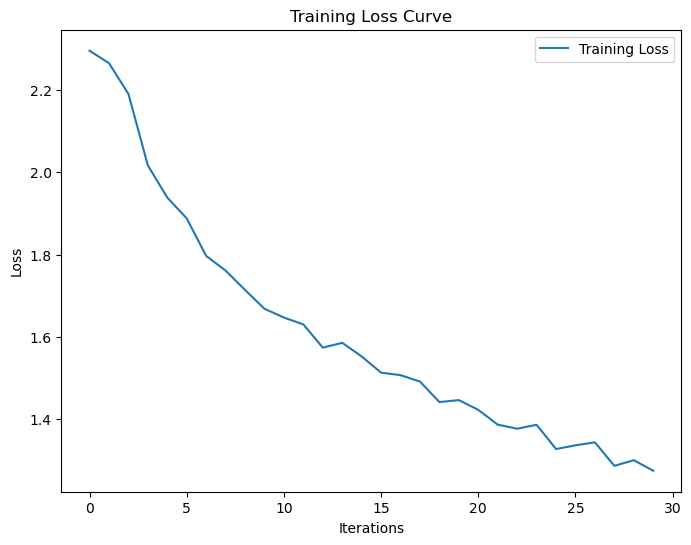

Accuracy of the network on the test images: 51.81%


In [28]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)  # Input size is 32x32x3, output size is 512
        self.fc2 = nn.Linear(512, 256) # Input size is 512, output size is 256
        self.fc3 = nn.Linear(256, 128) # Input size is 256, output size is 128
        self.fc4 = nn.Linear(128, 10)  # Input size is 256, output size is 10 (number of classes in CIFAR-10)

    # Pass through the 4 fully connected layer and apply ReLU activation function
    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)  # Flatten the input image to a suitable conected layer
        x = torch.relu(self.fc1(x)) 
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

annModel = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(annModel.parameters(), lr=0.001, momentum=0.9)

# Training the model
training_losses = []

epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = annModel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {running_loss / 200}')
            training_losses.append(running_loss / 200)
            running_loss = 0.0

print('Finished Training')

# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the network on the test images: {100 * accuracy}%')

## CNN Model

#### Define a Convolutional Neural Network

In [6]:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels, 6 output channels, kernel size 5x5
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling layer with kernel size 2x2 and stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)  # 6 input channels, 16 output channels, kernel size 5x5
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Input size 16*5*5, output size 120
        self.fc2 = nn.Linear(120, 84)  # Input size 120, output size 84
        self.fc3 = nn.Linear(84, 10)  # Input size 84, output size 10 (for classification)
        
    def forward(self, x):
        # Forward propagation of the network
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        x = torch.flatten(x, 1)  # Flatten the tensor except for the batch dimension
        x = torch.relu(self.fc1(x))  # Fully connected layer 1 -> ReLU
        x = torch.relu(self.fc2(x))  # Fully connected layer 2 -> ReLU
        x = self.fc3(x)  # Final fully connected layer (output layer)
        return x

# Create an instance of the CNN model
cnnModel = CNN()

#### Define a Convolutional Neural Network

In [7]:
# Define the criterion (loss function) for the model: 
# Sets up the criterion to measure the model's prediction accuracy 
# against actual target values during training, specifically used 
# for classification tasks.
criterion = nn.CrossEntropyLoss()


# Define the optimizer for updating model parameters during training: 
# Initializes the optimizer (Stochastic Gradient Descent - SGD) responsible
# for adjusting the model's weights based on the computed loss, using a learning 
# rate of 0.001 and a momentum value of 0.9.
optimizer = optim.SGD(cnnModel.parameters(), lr=0.001, momentum=0.9)

#### Train the Network

Epoch 1, Mini-batch 200, Loss: 1.972
Epoch 1, Mini-batch 400, Loss: 1.973
Epoch 1, Mini-batch 600, Loss: 1.986
Epoch 2, Mini-batch 200, Loss: 1.979
Epoch 2, Mini-batch 400, Loss: 1.978
Epoch 2, Mini-batch 600, Loss: 1.970
Finished Training


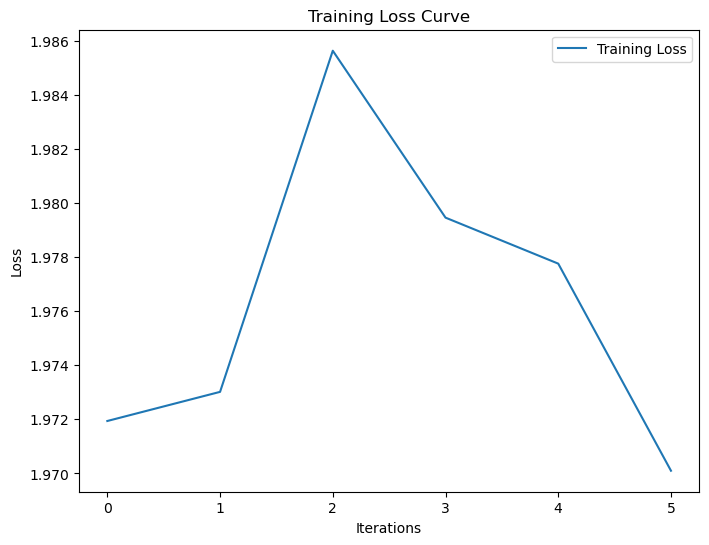

In [27]:
training_losses = []
for epoch in range(2):  # Loop over the dataset for a set number of epochs

    running_loss = 0.0  # Variable to keep track of the running loss for each epoch
    for i, data in enumerate(train_loader, 0):
        # `data` is a list of [inputs, labels]
        inputs, labels = data  # Unpack the input data and corresponding labels

        # Reset the gradients to zero
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = cnnModel(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)  # Compare model's output to actual labels

        # Backpropagation: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Update the weights
        optimizer.step()

        # Keep track of the total loss
        running_loss += loss.item()

        # Print statistics every 200 mini-batches
        if i % 200 == 199:
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}, Loss: {running_loss / 200:.3f}')
            training_losses.append(running_loss / 200)
            running_loss = 0.0  # Reset the running loss
            
print('Finished Training')  # Indicate the completion of training after looping through all epochs
            
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


## Model Testing

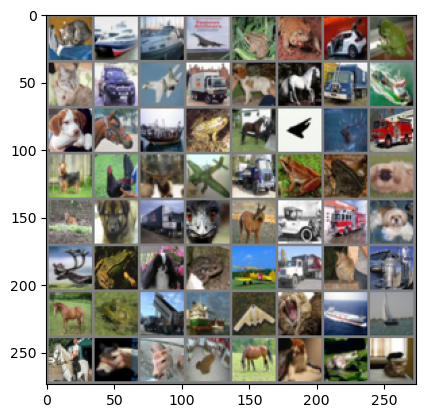

GroundTruth:  cat   ship  ship  plane
ANN Predicted:  cat   ship  ship  ship 
CNN Predicted:  cat   ship  ship  ship 


In [21]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

annOutputs = cnnModel(images)
cnnOutputs = cnnModel(images)
_, annPredicted = torch.max(cnnOutputs, 1)
_, cnnPredicted = torch.max(cnnOutputs, 1)
print('ANN Predicted: ', ' '.join(f'{classes[annPredicted[j]]:5s}'
                              for j in range(4)))
print('CNN Predicted: ', ' '.join(f'{classes[cnnPredicted[j]]:5s}'
                              for j in range(4)))

In [38]:
ann_correct = 0
cnn_correct = 0
total = 0

ann_correct_pred = {classname: 0 for classname in classes}
ann_total_pred = {classname: 0 for classname in classes}

cnn_correct_pred = {classname: 0 for classname in classes}
cnn_total_pred = {classname: 0 for classname in classes}

ann_accuracies = {}
cnn_accuracies = {}
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        annOutputs = annModel(images)
        cnnOutputs = cnnModel(images)
        # the class with the highest energy is what we choose as prediction
        _, cnnPredicted = torch.max(cnnOutputs.data, 1)
        _, annPredicted = torch.max(annOutputs.data, 1)
        total += labels.size(0)
        cnn_correct += (cnnPredicted == labels).sum().item()
        ann_correct += (annPredicted == labels).sum().item()

        _, cnnPredictions = torch.max(cnnOutputs, 1)
        _, annPredictions = torch.max(annOutputs, 1)
        # collect the correct predictions for each class
        for label, cnnPrediction in zip(labels, cnnPredictions):
            if label == cnnPrediction:
                cnn_correct_pred[classes[label]] += 1
            cnn_total_pred[classes[label]] += 1
            
        for label, annPrediction in zip(labels, annPredictions):
            if label == annPrediction:
                ann_correct_pred[classes[label]] += 1
            ann_total_pred[classes[label]] += 1
print(50 * "=")
print("ANN Accuracies:")
print(50 * "=")
print(f'ANN Accuracy of the network on the 10000 test images: {100 * cnn_correct // total} %')
# print accuracy for each class
for classname, correct_count in ann_correct_pred.items():
    accuracy = 100 * float(correct_count) / ann_total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    ann_accuracies[classname] = accuracy
print(50 * "=")
print("CNN Accuracies:")  
print(50 * "=")
print(f'CNN Accuracy of the network on the 10000 test images: {100 * cnn_correct // total} %')
for classname, correct_count in cnn_correct_pred.items():
    accuracy = 100 * float(correct_count) / cnn_total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    cnn_accuracies[classname] = accuracy
    
# Convert accuracies to a pandas DataFrame
ann_accuracy_df = pd.DataFrame(list(ann_accuracies.items()), columns=['Class', 'Accuracy'])
cnn_accuracy_df = pd.DataFrame(list(cnn_accuracies.items()), columns=['Class', 'Accuracy'])

# If you prefer a NumPy array for plotting:
ann_accuracy_array = ann_accuracy_df.to_numpy()
cnn_accuracy_array = cnn_accuracy_df.to_numpy()

ANN Accuracies:
ANN Accuracy of the network on the 10000 test images: 28 %
Accuracy for class: plane is 56.0 %
Accuracy for class: car   is 63.3 %
Accuracy for class: bird  is 37.0 %
Accuracy for class: cat   is 39.0 %
Accuracy for class: deer  is 34.0 %
Accuracy for class: dog   is 40.5 %
Accuracy for class: frog  is 58.1 %
Accuracy for class: horse is 61.1 %
Accuracy for class: ship  is 66.1 %
Accuracy for class: truck is 63.7 %
CNN Accuracies:
CNN Accuracy of the network on the 10000 test images: 28 %
Accuracy for class: plane is 46.5 %
Accuracy for class: car   is 23.4 %
Accuracy for class: bird  is 0.4 %
Accuracy for class: cat   is 19.2 %
Accuracy for class: deer  is 2.2 %
Accuracy for class: dog   is 17.0 %
Accuracy for class: frog  is 57.3 %
Accuracy for class: horse is 34.8 %
Accuracy for class: ship  is 29.7 %
Accuracy for class: truck is 55.1 %


In [36]:
print(ann_accuracy_array)
print(cnn_accuracy_array)

[['plane' 56.0]
 ['car' 63.3]
 ['bird' 37.0]
 ['cat' 39.0]
 ['deer' 34.0]
 ['dog' 40.5]
 ['frog' 58.1]
 ['horse' 61.1]
 ['ship' 66.1]
 ['truck' 63.7]]
[['plane' 46.5]
 ['car' 23.4]
 ['bird' 0.4]
 ['cat' 19.2]
 ['deer' 2.2]
 ['dog' 17.0]
 ['frog' 57.3]
 ['horse' 34.8]
 ['ship' 29.7]
 ['truck' 55.1]]
